<a href="https://www.kaggle.com/code/helayahyaoui/salary-prediction-linear-regression-from-scratch?scriptVersionId=100438804" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/years-of-experience-and-salary-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/years-of-experience-and-salary-dataset/Salary_Data.csv


# Dataset

In [2]:
dataset= pd.read_csv('../input/years-of-experience-and-salary-dataset/Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x=dataset.drop(columns='Salary', axis=1)
y=dataset['Salary']

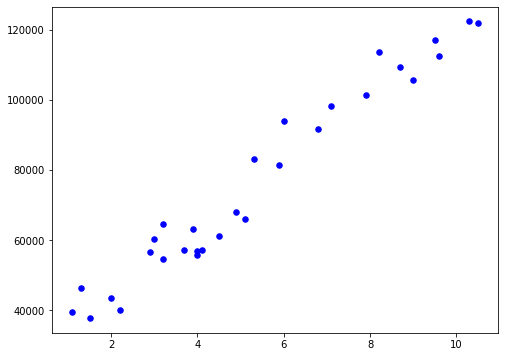

In [5]:
fig =plt.figure(figsize=(8,6))
plt.scatter(x, y, color="b", marker="o", s=30)
plt.show()

In [6]:
print('x shape  :  ', x.shape)
print('y shape  :  ', y.shape)

x shape  :   (30, 1)
y shape  :   (30,)


In [7]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=1234)

# Linear regression 

**Prediction function**

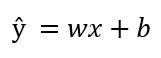

**Gradient descent algorithm**

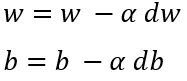

With : 
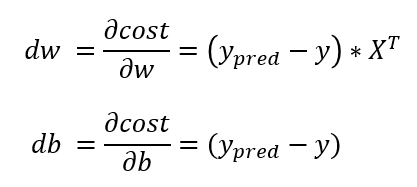

In [8]:
class linearRegression:
    def __init__(self, lr=0.001, itr=1000):
        self.lr = lr
        self.itr = itr
        self.weights = None
        self.bias = None
        
    def fit (self, x, y):
        m, n= x.shape
        self.w=np.zeros(n)
        self.b=0
        
        for _ in range(self.itr):
            ypred = np.dot(x, self.w)+ self.b
            
            dw= (1/m) * np.dot(x.T, (ypred - y)) 
            db= (1/m) * np.sum(ypred - y)
            
            self.w-=self.lr * dw
            self.b -= self.lr * db
            
    def predict (self, x):
        yp = np.dot(x, self.w) + self.b
        return yp
  

**Prediction**

In [9]:
    reg=linearRegression()
    reg.fit(x,y)
    ypred=reg.predict(xtest)

# MSE and Accuracy

In [10]:

def MSE(ytrue, ypred):
    return np.mean((ytrue- ypred)**2)
mse_v = MSE(ytest, ypred)
print(mse_v)

202570633.40197492


**np.corrcoef**: Return Pearson product-moment correlation coefficients.

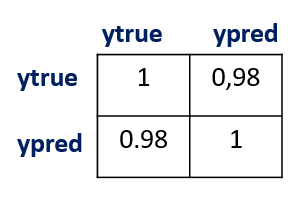

In [11]:
def score(ytrue, ypred):
    Cmatrix = np.corrcoef(ytrue, ypred)
    print(Cmatrix)
    corr = Cmatrix[0, 1]
    return corr ** 2

print(score(ytest, ypred))

[[1.         0.98090331]
 [0.98090331 1.        ]]
0.9621712966155149


# Plot

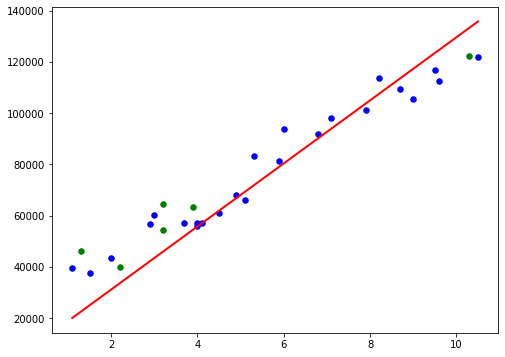

In [12]:
    y_pred_line = reg.predict(x)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(xtrain, ytrain, color='b', s=30)
    m2 = plt.scatter(xtest, ytest, color='g', s=30)
    plt.plot(x, y_pred_line, color="red", linewidth=2, label="Prediction")
    plt.show()